<a href="https://colab.research.google.com/github/rajputvivek07/Data-Analysis/blob/main/Vivek_46_DA_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Vivek Rajput

UID: 2019110046

Batch: A

Branch: ETRX

---



Objective: Based on competition available at Kaggle, https://www.kaggle.com/c/house-prices-advanced-regression-
techniques/overview/description,  revolving around predicting the house price through regression 
techniques. your objective is to build a regression model and measure the performance of the  model in 
terms of accuracy, recall, sensitivity, specificity, ROC curves, precision recall curves and loss function 
for regression. 

Dataset used: [House price prediction](https://www.kaggle.com/c/house-prices-advanced-regression-)

---



In [ ]:
import pandas as pd

In [ ]:
df_train=pd.read_csv('/content/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test=pd.read_csv('/content/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00000000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00000000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00000000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00000000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00000000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_train.shape

(1460, 81)

Cleaning the data

In [ ]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df

,column_name,percent_missing
Id,Id,0.00000000
MSSubClass,MSSubClass,0.00000000
MSZoning,MSZoning,0.00000000
LotFrontage,LotFrontage,17.73972603
LotArea,LotArea,0.00000000
...,...,...
MoSold,MoSold,0.00000000
YrSold,YrSold,0.00000000
SaleType,SaleType,0.00000000
SaleCondition,SaleCondition,0.00000000


In [ ]:
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.tail(20)

,column_name,percent_missing
Utilities,Utilities,0.00000000
Electrical,Electrical,0.06849315
MasVnrType,MasVnrType,0.54794521
MasVnrArea,MasVnrArea,0.54794521
BsmtQual,BsmtQual,2.53424658
BsmtCond,BsmtCond,2.53424658
BsmtFinType1,BsmtFinType1,2.53424658
BsmtFinType2,BsmtFinType2,2.60273973
BsmtExposure,BsmtExposure,2.60273973
GarageQual,GarageQual,5.54794521


The above snippet checks which columns have more than 50% null values.

In [ ]:
df_train.drop(['FireplaceQu', 'Fence','Alley','MiscFeature','PoolQC'], inplace=True, axis=1)

In [ ]:
df_test.drop(['FireplaceQu', 'Fence','Alley','MiscFeature','PoolQC'], inplace=True, axis=1)

The above snipppet drops columns with null values greater than 50%

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
df_train.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.00000000,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.00000000,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.00000000,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.00000000,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


The above snippet drops the null values from the data after removing the columns with more than 50% null values

In [ ]:
df_test.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00000000,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.00000000,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.00000000,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.00000000,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.00000000,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2912,20,RL,80.00000000,13384,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,5,2006,WD,Normal
1452,2913,160,RM,21.00000000,1533,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,12,2006,WD,Abnorml
1455,2916,160,RM,21.00000000,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.00000000,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml


In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.00000000,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.00000000,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.00000000,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.00000000,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


Time Series Analysis

In [ ]:
df_train["Date"] = df_train['YrSold'].astype(str) +"-"+ df_train["MoSold"].astype(str)
df_test["Date"] = df_test['YrSold'].astype(str) +"-"+ df_test["MoSold"].astype(str)

To perform time series analysis, the date and target value is onsidered. The above snippet combines the Year and Month to get the appropriate time and obsever the trends.

In [ ]:
df_train["Date"] = pd.to_datetime(df_train["Date"], format='%Y-%m-%d')
df_test["Date"] = pd.to_datetime(df_test["Date"], format='%Y-%m-%d')

The above snippet converts the row to an appropriate format for analysis.

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Date
0,1,60,RL,65.00000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2008-02-01
1,2,20,RL,80.00000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,2007-05-01
2,3,60,RL,68.00000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,2008-09-01
3,4,70,RL,60.00000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,2006-02-01
4,5,60,RL,84.00000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,2008-12-01


In [ ]:
result_df = df_train.sort_values(by = ['Date','MoSold'])

In [ ]:
result_df = pd.DataFrame(result_df, columns=['Date', 'SalePrice'])

Extracting two column vaues from the df - Time and target for time series plotting

In [ ]:
result_df

,Date,SalePrice
810,2006-01-01,181000
996,2006-01-01,136500
664,2006-01-01,423000
302,2006-01-01,205000
141,2006-01-01,260000
...,...,...
1160,2010-07-01,146000
1144,2010-07-01,80000
1421,2010-07-01,127500
66,2010-07-01,180000


In [ ]:
import matplotlib.pyplot as plt   
import seaborn as sns             
import numpy as np

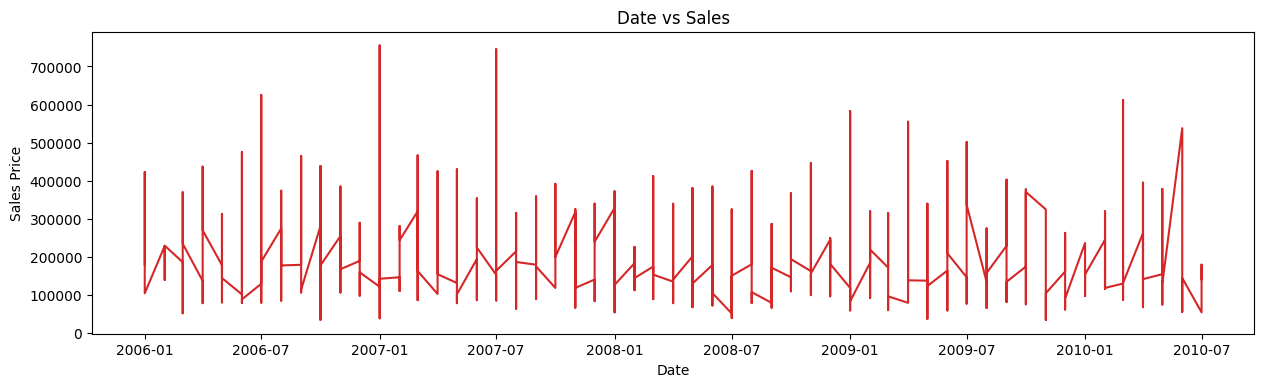

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Sales Price', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(result_df, x=result_df['Date'], y=result_df['SalePrice'], title='Date vs Sales')

The above snippet plots the graph of Date vs SalePrice of the dataset. The plot does not show any upward or downward trend in the values.

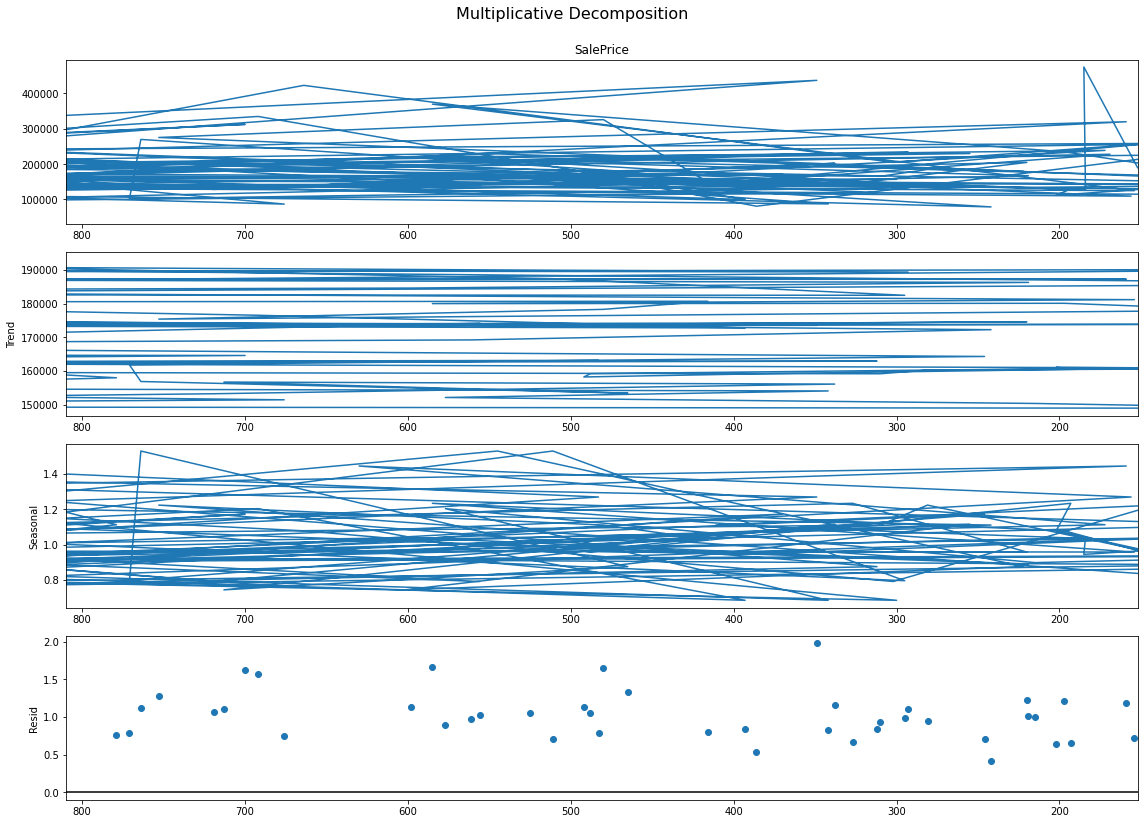

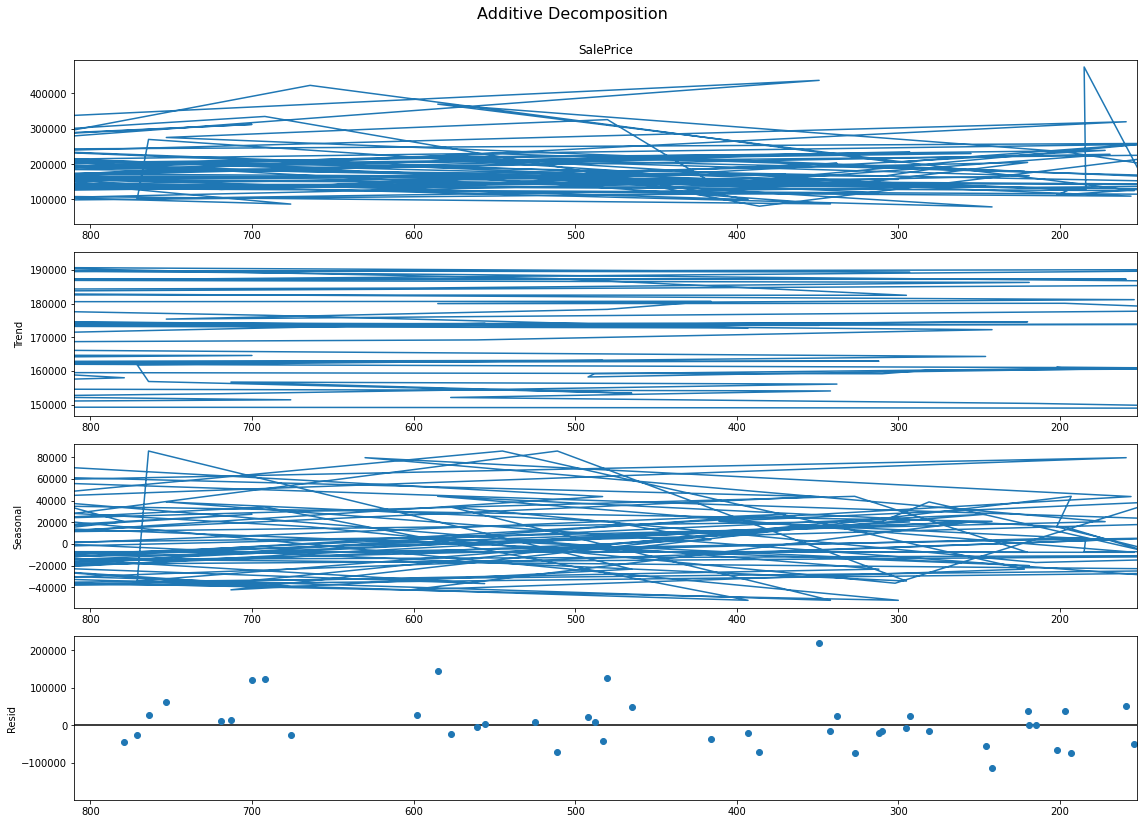

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

new_df=result_df.iloc[0:120,:]

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(new_df['SalePrice'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(new_df['SalePrice'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

The above snippet shows the seasonality, trend and the plot of the timeseries data. The plot does not show a regular trend or seasonality.

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline


series = result_df.loc[:, 'SalePrice'].values
result_df.plot(figsize=(14,8), legend=None, title='House Sales Price');

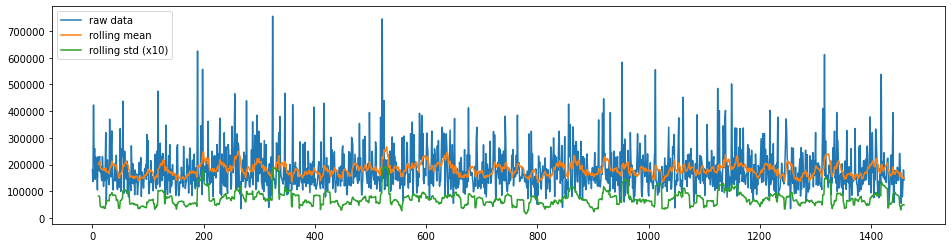

In [ ]:
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(series,'raw data')

p<0.05 ->stationary

p>0.05 ->Non-stationary

In [ ]:
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -18.35213537361626
n_lags: 2.2354809922583014e-30
p-value: 2.2354809922583014e-30
Critial Values:
   1%, -3.4348523191002123
Critial Values:
   5%, -2.8635284734563364
Critial Values:
   10%, -2.567828646449617


Value of p<0.05 which proves the data is stationary. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

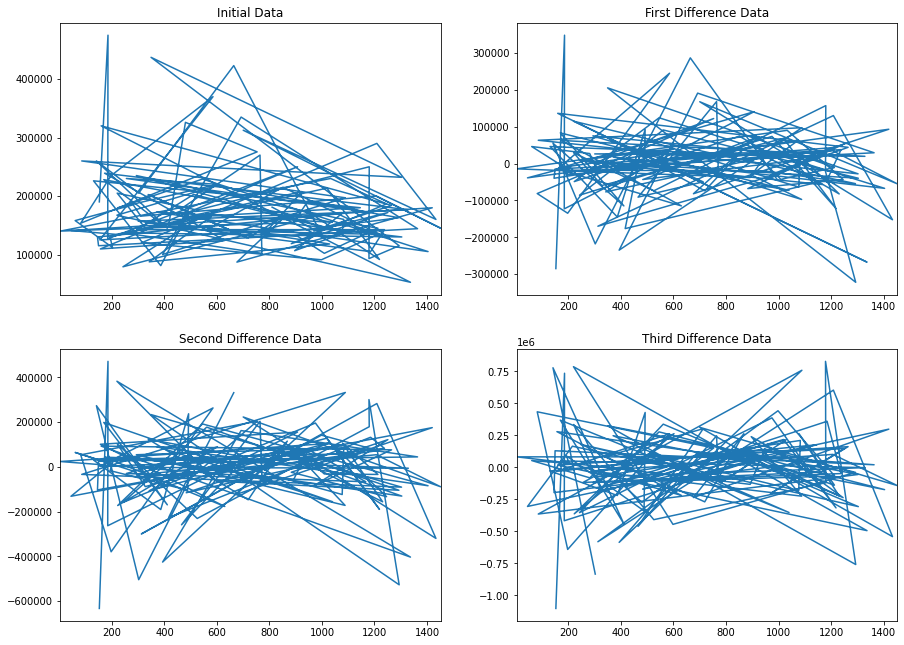

In [ ]:
from statsmodels.tsa.statespace.tools import diff
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15, 11))

new_df['SalePriceDiff1'] = diff(new_df['SalePrice'],k_diff=1)
new_df['SalePriceDiff2'] = diff(new_df['SalePrice'],k_diff=2)
new_df['SalePriceDiff3'] = diff(new_df['SalePrice'],k_diff=3)

new_df['SalePrice'].plot(title="Initial Data",ax=ax[0][0]).autoscale(axis='x',tight=True);
new_df['SalePriceDiff1'].plot(title="First Difference Data",ax=ax[0][1]).autoscale(axis='x',tight=True);
new_df['SalePriceDiff2'].plot(title="Second Difference Data",ax=ax[1][0]).autoscale(axis='x',tight=True);
new_df['SalePriceDiff3'].plot(title="Third Difference Data",ax=ax[1][1]).autoscale(axis='x',tight=True);

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


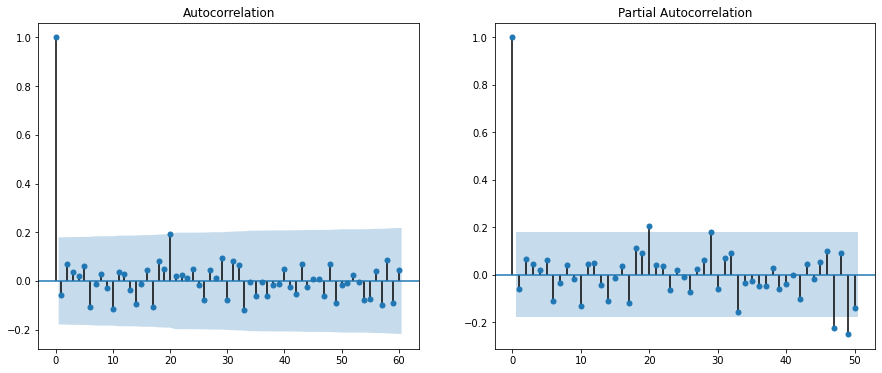

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,acf
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
autocorr = acf(new_df['SalePrice'], nlags=60) # just the numbers
plot_acf(new_df['SalePrice'].tolist(), lags=60, ax=ax[0]); # just the plot
plot_pacf(new_df['SalePrice'].tolist(), lags=50, ax=ax[1]); # just the plot

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00000000,1460.00000000,1201.00000000,1460.00000000,1460.00000000,1460.00000000,1460.00000000,1460.00000000,1452.00000000,1460.00000000,...,1460.00000000,1460.00000000,1460.00000000,1460.00000000,1460.00000000,1460.00000000,1460.00000000,1460.00000000,1460.00000000,1460.00000000
mean,730.50000000,56.89726027,70.04995837,10516.82808219,6.09931507,5.57534247,1971.26780822,1984.86575342,103.68526171,443.63972603,...,94.24452055,46.66027397,21.95410959,3.40958904,15.06095890,2.75890411,43.48904110,6.32191781,2007.81575342,180921.19589041
std,421.61000937,42.30057099,24.28475177,9981.26493238,1.38299655,1.11279934,30.20290404,20.64540681,181.06620659,456.09809084,...,125.33879435,66.25602768,61.11914860,29.31733056,55.75741528,40.17730694,496.12302446,2.70362621,1.32809512,79442.50288289
min,1.00000000,20.00000000,21.00000000,1300.00000000,1.00000000,1.00000000,1872.00000000,1950.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,2006.00000000,34900.00000000
25%,365.75000000,20.00000000,59.00000000,7553.50000000,5.00000000,5.00000000,1954.00000000,1967.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5.00000000,2007.00000000,129975.00000000
50%,730.50000000,50.00000000,69.00000000,9478.50000000,6.00000000,5.00000000,1973.00000000,1994.00000000,0.00000000,383.50000000,...,0.00000000,25.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,6.00000000,2008.00000000,163000.00000000
75%,1095.25000000,70.00000000,80.00000000,11601.50000000,7.00000000,6.00000000,2000.00000000,2004.00000000,166.00000000,712.25000000,...,168.00000000,68.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,8.00000000,2009.00000000,214000.00000000
max,1460.00000000,190.00000000,313.00000000,215245.00000000,10.00000000,9.00000000,2010.00000000,2010.00000000,1600.00000000,5644.00000000,...,857.00000000,547.00000000,552.00000000,508.00000000,480.00000000,738.00000000,15500.00000000,12.00000000,2010.00000000,755000.00000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             1460 non-null   int64         
 1   MSSubClass     1460 non-null   int64         
 2   MSZoning       1460 non-null   object        
 3   LotFrontage    1201 non-null   float64       
 4   LotArea        1460 non-null   int64         
 5   Street         1460 non-null   object        
 6   LotShape       1460 non-null   object        
 7   LandContour    1460 non-null   object        
 8   Utilities      1460 non-null   object        
 9   LotConfig      1460 non-null   object        
 10  LandSlope      1460 non-null   object        
 11  Neighborhood   1460 non-null   object        
 12  Condition1     1460 non-null   object        
 13  Condition2     1460 non-null   object        
 14  BldgType       1460 non-null   object        
 15  HouseStyle     1460 n

In [ ]:
X=result_df['Date']
y=result_df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)



---


**Inferences**:

1. The time series data shows no specific trend in the value
2. The p value is less than 0.05 in case of an ADF stastic,proving it is non stationary.
3. Auto correlation plot shows high correlation at the beginning.
4. The autocorrelation plot shows high value in the beginning indicating the signal repeats for a short period but then shows lower value indicating no reptition.
5. The partial autocrolation also shows a high value at the beginning but reduces as time proceeds.
6. All the above tests indicate that the data is a stationary data and an ARMA model can be used to predict the output.

---

